>## **TMDB MOVIE DATA ANALYSIS**

### 1. **INTRODUCTION**
#### ***Overview***
In response to the growing trend of companies investing in original video content, our company plans to launch a new movie studio. To guide this initiative, we analyze movie data from The Movie Database (TMDB) to explore which types of films are performing best at the box office. Through this data-driven analysis, we deliver actionable recommendations on the genres, budgets, and release strategies that maximize commercial success.
### 2. **OBJECTIVES**

i). **To identify the most successful genres**- Check for the most common and popular genre & which genres have the highest audience ratings and popularity scores

Key takeaway:*Inorder to help the studio choose the right type of movies to produce*

ii). **To understand what factors make a movie popular**- Check how factors like release date, language, vote average, and vote count relate to a movie's success

Key takeaway:*Inorder to help us understand what elements drive a hit*

iii). **To provide actionable insights for strategic movie production**-Based on the data, give recommendations what type of movies(genre, language,release date) the studio should focus on

Key takeaway: *Inorder to directly support business decisions with significant strategies*

## 【1】*Data Exploration* 

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline

In [46]:
# Load the dataset
df = pd.read_csv("tmdb.movies.csv", index_col=0)

# Display the first 10 rows of the dataset
df.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [47]:
# show basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


.info() helps us see missing values, column types, number of rows and the total number of columns.  Our data frame has 26517 Rows and 9 columns

In [48]:
# Check for the shape of the dataset
df.shape

(26517, 9)

In [49]:
# Summary Statistics
df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


.describe() shows the averages, medians, minimum, maximum, standard deviation and upper&lower quartiles for the numeric columns.

In [50]:
# Check for missing values
df.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

in our dataset there are no missing values

## 【2】*Data Cleaning* 

In [51]:
# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_date']

0       2010-11-19
1       2010-03-26
2       2010-05-07
3       1995-11-22
4       2010-07-16
           ...    
26512   2018-10-13
26513   2018-05-01
26514   2018-10-01
26515   2018-06-22
26516   2018-10-05
Name: release_date, Length: 26517, dtype: datetime64[ns]

converting the column ensures that all dates are in a consistent format and that you can perform operations like extracting the year, month or day, filtering data by specific date ranges and Sorting or Grouping data by time periods. 

errors=`coerce` converts invalid/missing dates to Not a time making it easier to handle data

In [52]:
# Convert 'genre_ids' from string to list of integers
# import ast because the genre_ids are stored as text that looks like a list
# use the ast.literal_eval() because it safely converts a string into real python objects(list,dict,etc)
import ast
df['genre_ids'] = df['genre_ids'].apply(ast.literal_eval)
df['genre_ids'].head(10)

0             [12, 14, 10751]
1         [14, 12, 16, 10751]
2               [12, 28, 878]
3             [16, 35, 10751]
4               [28, 878, 12]
5             [12, 14, 10751]
6           [28, 12, 14, 878]
7             [16, 10751, 35]
8             [16, 10751, 35]
9    [16, 28, 35, 10751, 878]
Name: genre_ids, dtype: object

In [53]:
# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


In [54]:
# Display the first 5 rows of the dataset
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [55]:
# Standard TMDB genre ID to name mapping
genre_id_to_name = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}

# Expand genre_ids into individual rows for analysis
df_exploded = df.explode('genre_ids')
df_exploded['genre_name'] = df_exploded['genre_ids'].map(genre_id_to_name)

# Drop rows where genre_id didn't match a known genre
df_exploded = df_exploded.dropna(subset=['genre_name'])

# Calculate genre statistics
genre_stats = df_exploded.groupby('genre_name').agg(
    movie_count=('id', 'count'),
    avg_popularity=('popularity', 'mean'),
    avg_vote=('vote_average', 'mean'),
    total_votes=('vote_count', 'sum')
).sort_values(by='movie_count', ascending=False)

genre_stats.reset_index()


,genre_name,movie_count,avg_popularity,avg_vote,total_votes
0,Drama,8303,3.978203,6.112200,2064637
1,Comedy,5652,3.863435,5.942074,1403883
2,Documentary,4965,1.348202,6.817946,62283
3,Thriller,4207,4.840918,5.354433,1342877
4,Horror,3683,3.245644,4.847624,502490
5,Action,2612,6.495047,5.578560,1912290
6,Romance,2321,4.162464,5.981603,621223
7,Science Fiction,1762,5.238197,5.442736,1222644
8,Family,1565,4.735889,5.990479,652585
9,Crime,1515,5.416396,5.852475,632691


`.explode()` separates list items into individual rows. In our dataset, each movie can belong to multiple genres. Therefore, if you don't split them apart, you can't analyze genres one-by-one. You'll be stuck treating [12,14,10751] as one "***thing***".

Key takeaway; 
with `.explode()` one movie=many rows,one genre per row which can be easy to analyze
without `.explode()` one movie=one row with many genres which can be hard to analyze genres separately

-  Drama and Comedy dominate in quantity.

-  Adventure is the most popular genre on average.

-  Animation, Music and History get higher average ratings.

-  For wide appeal and strong fan response, Action + Adventure is a potent combination.

## 【3】*Data Analysis and Visualization* 

>#### Objective 1. ***Identify the most successful genres***

In [56]:
# Sort genres by average popularity in descending order
top_genres = genre_stats.sort_values(by='avg_popularity', ascending=False)

# Reset the index for better readability
top_genres.reset_index()

,genre_name,movie_count,avg_popularity,avg_vote,total_votes
0,Adventure,1400,7.557082,5.930071,1645828
1,Action,2612,6.495047,5.578560,1912290
2,Fantasy,1139,6.387318,5.952327,902816
3,Crime,1515,5.416396,5.852475,632691
4,War,330,5.320197,6.229394,141336
5,Science Fiction,1762,5.238197,5.442736,1222644
6,Thriller,4207,4.840918,5.354433,1342877
7,Mystery,1237,4.821546,5.730315,442671
8,Family,1565,4.735889,5.990479,652585
9,Animation,1486,4.584240,6.464805,506612


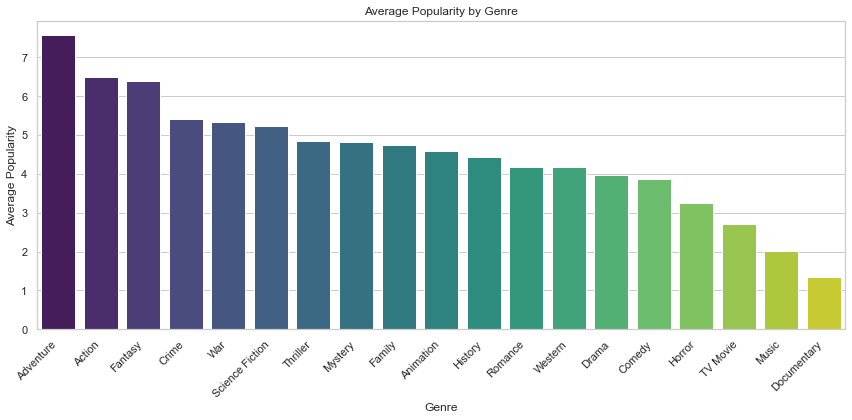

In [57]:
# Most Common and popular genre
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Bar plot: Top genres by average popularity
top_genres = genre_stats.sort_values(by='avg_popularity', ascending=False)

sns.barplot(data=top_genres, x=top_genres.index, y='avg_popularity', palette='viridis')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show();


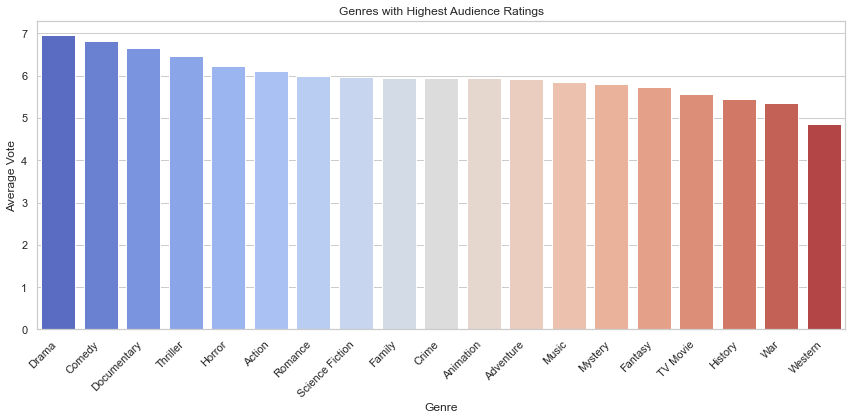

In [58]:
# Plot for Genre with highest average vote
# Set style 
plt.figure(figsize=(12, 6)) 
sns.set(style="whitegrid")

# Bar plot: Genres with highest average vote
sns.barplot(data=genre_stats.sort_values(by='avg_vote', ascending=False), 
            x=genre_stats.index, y='avg_vote', palette='coolwarm')
plt.title('Genres with Highest Audience Ratings')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Vote')
plt.tight_layout()
plt.show();

### **Actionable Insights From This Analysis**
>**Genre-Based Insights**

-**Adventure and Action films show the highest average popularity**, making them ideal choices for wide-audience appeal.

-**Drama and Comedy dominate in quantity**, offering diverse storytelling potential but require standout narratives to break through.

-**Animation, Music and History genres receive higher average ratings**, suggesting they excel in quality and critical reception, albeit often with smaller niche audiences that is;

   - *"receive higher average ratings"*:When viewers rate movies (on platforms like TMDB), Animation and History movies tend to get higher scores (e.g., 7.5 out of 10), meaning people who watch them generally think they're good.

   - *"suggesting they excel in quality and critical reception"*:These higher ratings imply that these genres are often well-made — whether in terms of storytelling, visuals, or emotional impact. They’re also more likely to be appreciated by critics or win awards.

   - *"albeit often with smaller niche audiences"*:However, these genres typically don’t attract huge numbers of viewers like Action or Comedy. Instead, they appeal to specific groups of people who actively seek them out — such as history enthusiasts or animation fans.

>#### Objective 2. ***Factors that make a movie popular*** 

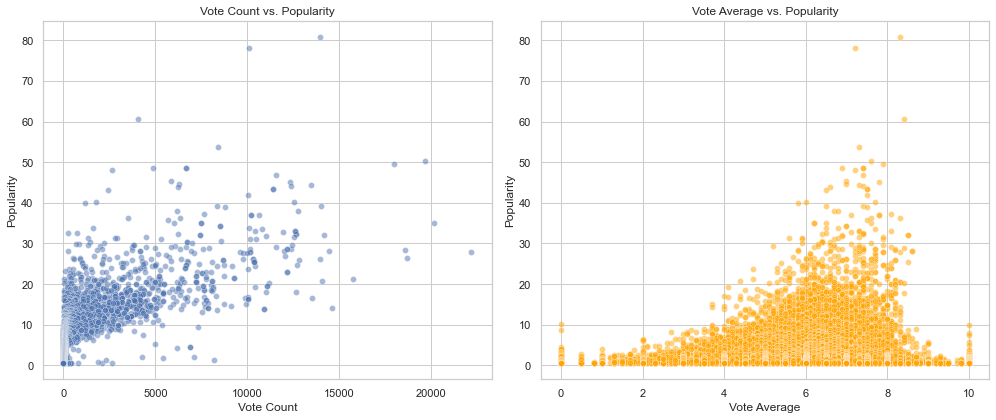

In [59]:
# Scatter plots: Vote Count and Vote Average vs. Popularity
plt.figure(figsize=(14, 6))

# Plot Vote Count vs. Popularity
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='vote_count', y='popularity', alpha=0.5)
plt.title('Vote Count vs. Popularity')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')

# Plot Vote Average vs. Popularity
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='vote_average', y='popularity', alpha=0.5, color='orange')
plt.title('Vote Average vs. Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')

plt.tight_layout()
plt.show();

This visualization consists of two scatter plots that explore the relationships between **popularity**, **vote count**, and **vote average**:

**i. Vote Count vs. Popularity**
- **Observation**:
  - There is a **positive correlation** between vote count and popularity.
  - Movies with higher vote counts tend to have higher popularity scores.
  - However, there is a cluster of movies with low vote counts and low popularity, indicating many movies are not widely popular or voted on.
- **Interpretation**:
  - Popularity is influenced by the number of votes a movie receives. Movies with more votes are likely to have been seen by a larger audience, contributing to their popularity.
  - Outliers with high popularity but low vote counts may represent niche or trending movies that gained attention quickly.

**ii. Vote Average vs. Popularity**

- **Observation**:
  - There is a **weak or no clear correlation** between vote average and popularity.
  - Movies with high popularity can have a wide range of vote averages, from low to high.
  - Most movies cluster around a vote average of 6–8, regardless of popularity.
- **Interpretation**:
  - Popularity does not strongly depend on the average rating of a movie. A movie can be popular even if its ratings are average or below average.
  - This suggests that factors other than quality (e.g., marketing, star power, or genre) may drive popularity.

#### **Actionable Insights From This Analysis**
> **Factor-Based Insights**
1. **Vote Count is a Stronger Predictor of Popularity**: Movies with more votes are generally more popular, indicating audience engagement is a key factor in popularity.
2. **Vote Average has Limited Influence on Popularity**: High ratings do not necessarily translate to high popularity. Popularity may be driven by external factors like promotion or cultural trends.
3. **Clusters and Outliers**:
   - The clustering of movies with low vote counts and low popularity suggests many movies fail to reach a wide audience.
   - Outliers with high popularity but low vote counts or low ratings may represent viral or niche movies.

This analysis highlights the importance of audience engagement (vote count) over critical acclaim (vote average) in determining a movie's popularity.

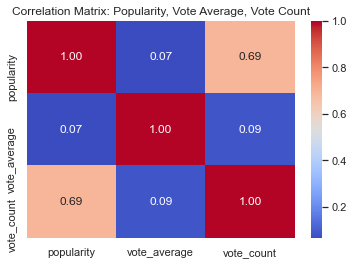

In [60]:
# Correlation Heatmap among selected numerical features
cols = ['popularity', 'vote_average', 'vote_count']
corr = df[cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Popularity, Vote Average, Vote Count')
plt.show()

Correlation Heatmap calculates the correlation matrix for popularity, vote_average, and vote_count to quantitatively assess how these factors relate.
Therefore, the heatmap offers an intuitive visual representation(direction) and shows strength of these relationships. This makes it easier to identify which factors are most strongly associated with movie popularity.

- *Stronger correlation between vote_count and popularity since;*
**Diagonal Values (1.00):** The diagonal represents the correlation of each variable with itself, which is always 1.00 (perfect correlation).

- *Moderate correlation between popularity and vote_count since;*
**Popularity and Vote Count (0.69):** There is a moderately strong positive correlation (0.69) between popularity and vote_count. This suggests that movies with more votes tend to be more popular.

- *Weaker or inconsistent link between vote_average and popularity since;*
**Popularity and Vote Average (0.07):** There is a very weak positive correlation (0.07) between popularity and vote_average. This indicates that the average rating of a movie has little to no relationship with its popularity.

>### **Hypothesis Testing Based on the Correlation Matrix**
**A. Define the Hypotheses**

**Hypothesis 1: Relationship between Popularity and Vote Count**

- **Null Hypothesis (H₀):** There is no significant correlation between `popularity` and `vote_count` (correlation = 0).

- **Alternative Hypothesis (H₁):** There is a significant correlation between `popularity` and `vote_count` (correlation ≠ 0).

**Hypothesis 2: Relationship between Popularity and Vote Average**

- **Null Hypothesis (H₀):** There is no significant correlation between `popularity` and `vote_average` (correlation = 0).

- **Alternative Hypothesis (H₁):** There is a significant correlation between `popularity` and `vote_average` (correlation ≠ 0).


**B. Select a Statistical Test**

To test the significance of the correlations, you can use the **Pearson correlation coefficient test**. This test evaluates whether the observed correlation is significantly different from zero.

**C. Perform the Test**

Use the `scipy.stats.pearsonr` function to calculate the correlation coefficient and the p-value for each pair of variables.



In [61]:
# Correlation Analysis
# Statistical test for correlation between popularity and vote_count, vote_average
# Import necessary libraries
from scipy.stats import pearsonr

# Test correlation between popularity and vote_count
corr_popularity_vote_count, p_value_popularity_vote_count = pearsonr(df['popularity'], df['vote_count'])

# Test correlation between popularity and vote_average
corr_popularity_vote_average, p_value_popularity_vote_average = pearsonr(df['popularity'], df['vote_average'])

# Print results
print("Correlation between Popularity and Vote Count:")
print(f"Correlation Coefficient: {corr_popularity_vote_count:.2f}, P-value: {p_value_popularity_vote_count:.4f}")

print("\nCorrelation between Popularity and Vote Average:")
print(f"Correlation Coefficient: {corr_popularity_vote_average:.2f}, P-value: {p_value_popularity_vote_average:.4f}")


Correlation between Popularity and Vote Count:
Correlation Coefficient: 0.69, P-value: 0.0000

Correlation between Popularity and Vote Average:
Correlation Coefficient: 0.07, P-value: 0.0000


**D. Results Interpretation**

The correlation coefficient between popularity and vote count is 0.69 which indicates a moderately strong positive correlation. Movies with higher vote counts tend to have higher popularity scores which suggests that audience engagement is a key driver of popularity.
The P-value<0.05, meaning the correlation is statistically significant therefore, we reject the null hypothesis. We can confidently conclude that there is a meaningful rel.ationship between vote count and popularity

The correlation coefficient between popularity and vote average is 0.07 which indicates a very weak positive correlation. The average ratin g of molvie has little to no impact on its popularity. A movie can  be popular regardless of whether it has high or low ratings.
The P-value<0.05, meaning the weak correlation is statistically significant therefore, we reject the null hypothesis. However the strength of the relationship is so small that it is unlikely to have practical importance


> #### Objective 3. ***Provide Insights for Strategic Movie Production***


In [62]:
# Extract release year
df['release_year'] = df['release_date'].dt.year

# Group by release year
yearly_stats = df.groupby('release_year').agg({
    'id': 'count',
    'popularity': 'mean',
    'vote_average': 'mean'
}).rename(columns={'id': 'movie_count'})

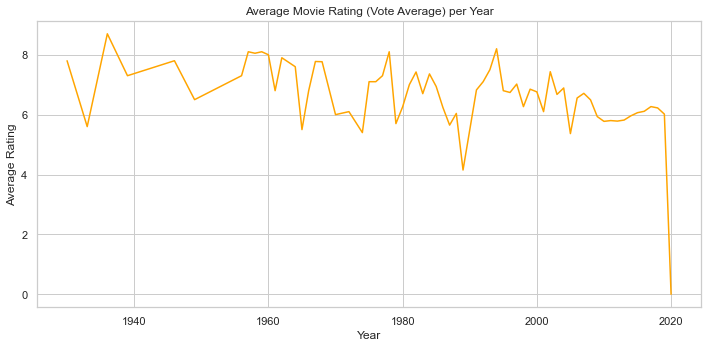

In [63]:
# Average Vote Average per Year
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_stats, x=yearly_stats.index, y='vote_average', color='orange')
plt.title("Average Movie Rating (Vote Average) per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show();

### **Actionable Insights From This Analysis**
>**Trends-Based Insights**

- *Trends Over Time*:

-There’s been a steady increase in movie production over the past few decades, indicating a highly competitive market. However, the sharp drop in 2020 could be due to incomplete data or the impact of the COVID-19 pandemic, which significantly disrupted the movie industry (e.g., fewer releases, limited audience engagement).

-Average ratings have remained relatively stable, suggesting that while volume increases, quality (as perceived by audiences) doesn’t fluctuate dramatically.

## Conclusion

**Business Recommendations**: 
1. **Focus on Consistency**:Since ratings have remained stable, studios should focus on maintaining consistent quality rather than chasing trends that may not significantly impact ratings.

2. **Popularity**: Action and Adventure are the most popular making them ideal choices for wide-audience appeal.

3. **Focus on Values of lean**: Movies with higher vote counts tend to have higher popularity scores. This suggests that audience engagement is a key driver of popularity therefore, our films should focus on customer's needs to ensure our audience engagement is high.